In [ ]:
# To find out what version of Python the notebook is using
from platform import python_version
print(python_version())

In [ ]:
from sklearn.externals.joblib import Parallel, delayed, Memory as JoblibMemory

In [ ]:
x = dict({1:None, 2:None, 3:None})
print(x.values())

In [ ]:
for xv in x.values():
    print(xv is None)

In [ ]:
(list(x.values())).count(None)

In [ ]:
import nistats

In [ ]:
from nistats.first_level_model import first_level_models_from_bids

In [ ]:
first_level_models_from_bids?

In [ ]:
from nistats.datasets import fetch_bids_langloc_dataset
data_dir, _ = fetch_bids_langloc_dataset()

In [ ]:
data_dir

In [ ]:
from nistats import datasets
data = datasets.fetch_fiac_first_level()

In [ ]:
type(data)

In [ ]:
data

In [ ]:
data['func1']

In [ ]:
from nistats.datasets import fetch_spm_multimodal_fmri

In [ ]:
spm_mm = fetch_spm_multimodal_fmri()

In [ ]:
spm_mm['events1']

In [ ]:
spm_mm['events{}'.format(2)]

In [ ]:
###
# Tried and failed. Keeping it to work it out later.
###

# Use the first_level_model_from_bids() function to set up the model
# It needs a data and derivatives directory and a task label. I was wondering 
# why a data directory is required, but I guess it is for the events files.

data_dir = base_dir + 'sub-01/func/'
derivatives_folder = base_dir + 'troubleshoot_op/sub-01/func/'
task_label = 'rhymejudgment'

models, imgs, events, confounds = first_level_models_from_bids(
    data_dir, task_label, space_label='', 
    derivatives_folder=derivatives_folder,
    t_r=2, smoothing_fwhm=5)

In [ ]:
from os import scandir, listdir

In [ ]:
scandir('/volatile/sshankar/ds000003-00001/')

In [ ]:
listdir('/volatile/sshankar/ds000003-00001/sub*')

In [ ]:
str(100).zfill(2)

In [ ]:
from nilearn.datasets import fetch_localizer_contrasts
n_subjects = 16
data = fetch_localizer_contrasts(["left vs right button press"], n_subjects,
                                 get_tmaps=True)



In [19]:
from nilearn import plotting

In [20]:
plotting.view_img('../ds000003-00001/sub-06/anat/sub-06_T1w.nii.gz')

/volatile/sshankar/pyp_env/lib/python3.6/site-packages/nilearn/image/resampling.py:510: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


In [21]:
plotting.view_img('../ds000003-00001/sub-06/anat/sub-06_inplaneT2.nii.gz')

/volatile/sshankar/pyp_env/lib/python3.6/site-packages/nilearn/image/resampling.py:510: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


In [ ]:
plotting.plot_stat_map('../nilearn_data/brainomics_localizer/brainomics_data/S03/t_map_left_auditory_&_visual_click_vs_right_auditory&visual_click.nii.gz')

In [ ]:
plotting.plot_stat_map('../nilearn_data/brainomics_localizer/brainomics_data/S03/c_map_left_auditory_&_visual_click_vs_right_auditory&visual_click.nii.gz')

In [ ]:
data['cmaps']

In [ ]:
plotting.plot_stat_map('../ds000003-00001/Statistics/sub-01/sub-01_word-pseudoword_stat-map.nii.gz', threshold=2, 
                       display_mode='z', black_bg=True)

In [ ]:
plotting.plot_stat_map('../ds000003-00001/Statistics/sub-05/sub-05_word-pseudoword_stat-map.nii.gz', threshold=2, 
                       display_mode='z', black_bg=True)

In [ ]:
plotting.plot_stat_map('../ds000003-00001/Statistics/sub-11/sub-11_word-pseudoword_stat-map.nii.gz', threshold=2, 
                       display_mode='z', black_bg=True)

In [ ]:
import pandas as pd
second_level_input = data['cmaps']
design_matrix = pd.DataFrame([1] * len(second_level_input),
                             columns=['intercept'])

In [ ]:
design_matrix

In [ ]:
from nistats.second_level_model import SecondLevelModel
second_level_model = SecondLevelModel(smoothing_fwhm=8.0)
second_level_model = second_level_model.fit(second_level_input,
                                            design_matrix=design_matrix)

In [ ]:
second_level_input

In [ ]:
second_level_model.get_params()

In [3]:
from nistats import reporting

/volatile/sshankar/pyp_env/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [4]:
reporting.make_glm_report?

In [6]:
for i in range(1,13):
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12


In [7]:
from nistats.first_level_model import FirstLevelModel

In [11]:
FirstLevelModel.fit?

In [12]:
FirstLevelModel.compute_contrast?

In [13]:
import pandas as pd

In [14]:
conf = pd.read_csv('/volatile/sshankar/out/fmriprep/sub-01/func/sub-01_task-rhymejudgment_desc-confounds_regressors.tsv', sep='\t')

In [15]:
%matplotlib inline

In [16]:
from matplotlib.pyplot import plot

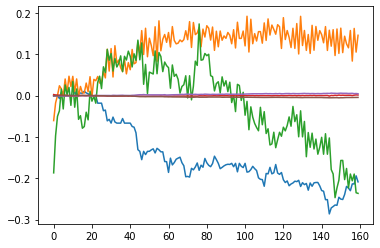

In [17]:
plot(conf.iloc[:,[-24,-20,-16,-12,-8,-4]])

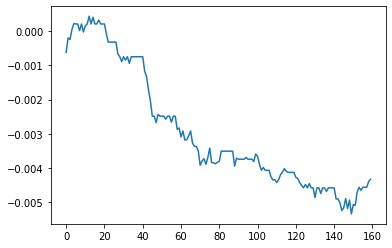

In [18]:
plot(conf.iloc[:,-4])

In [22]:
import numpy as np

In [24]:
np.ones(3)

array([1., 1., 1.])

In [1]:
import numpy as np

In [17]:
f = np.load('/volatile/sshankar/fastsrm_data/raiders/3mm/sub-01/ses-01/masked_imgs.npy', allow_pickle=True)
f2 = np.load('/volatile/sshankar/fastsrm_data/raiders/3mm/sub-01/ses-02/masked_imgs.npy', allow_pickle=True)

In [23]:
fc = np.concatenate((np.concatenate(f),np.concatenate(f2)))

In [11]:
f.shape

(6,)

In [24]:
fc.shape

(12,)

In [15]:
import os
movie_dir = '/volatile/sshankar/fastsrm_data/raiders/3mm/'
subs = os.listdir(movie_dir)

In [16]:
len(subs)

10

In [4]:
import nibabel

In [5]:
nibabel.save?

In [7]:
import numpy as np
s = np.str(2)

In [8]:
s

'2'

In [10]:
s =np.array((10,20), dtype='object')

In [14]:
np.empty?

In [12]:
s[0,0] = 's'

IndexError: too many indices for array